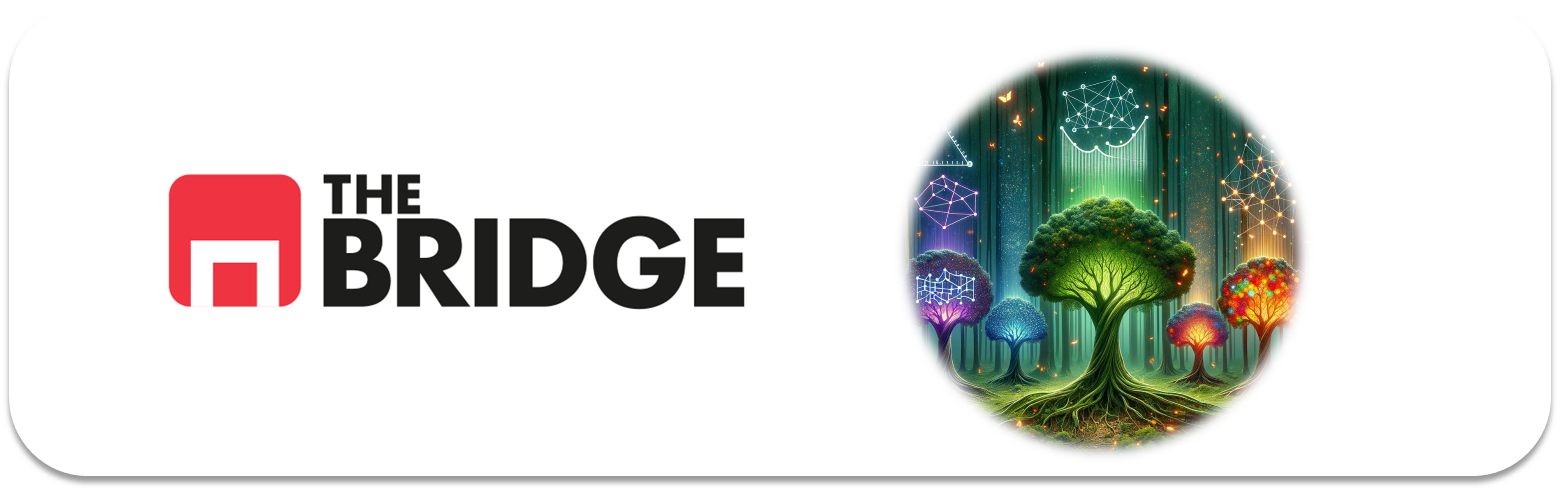

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df_db = pd.read_csv(url, header=None)

In [3]:
df_db.columns = names

In [4]:
df_db

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

_________________________________________________________

###  Creación de TRAIN y TEST y análisis de las FEATURES y TARGET

Echamos un vistazo primero al dataset.

In [5]:
df_db.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No hay nulos y todas las variables son de tipo numérica.

Dividimos el dataset en **Train** y **Test**

In [7]:
train_set, test_set = train_test_split(df_db, test_size=0.2, random_state=42)

Asignamos la **Target** a la variable `class` y vemos su distribución


<Axes: xlabel='class', ylabel='count'>

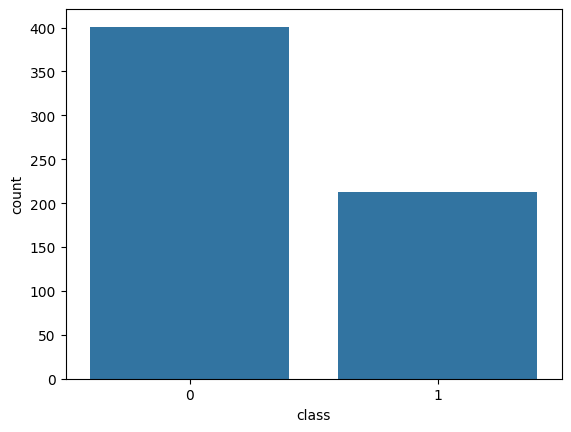

In [8]:
target = 'class'

sns.countplot(train_set, x=target)

Se ve un claro desbalanceo entre una clase y otra. Esto se tendrá en cuenta a la hora de asignar los hiperparámetros de los modelos.

Asignamos los demás valores como **Features** y hacer un pequeño análisis de cada variable con el **Target**

In [9]:
features = [col for col in train_set.columns if col != target]
features

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

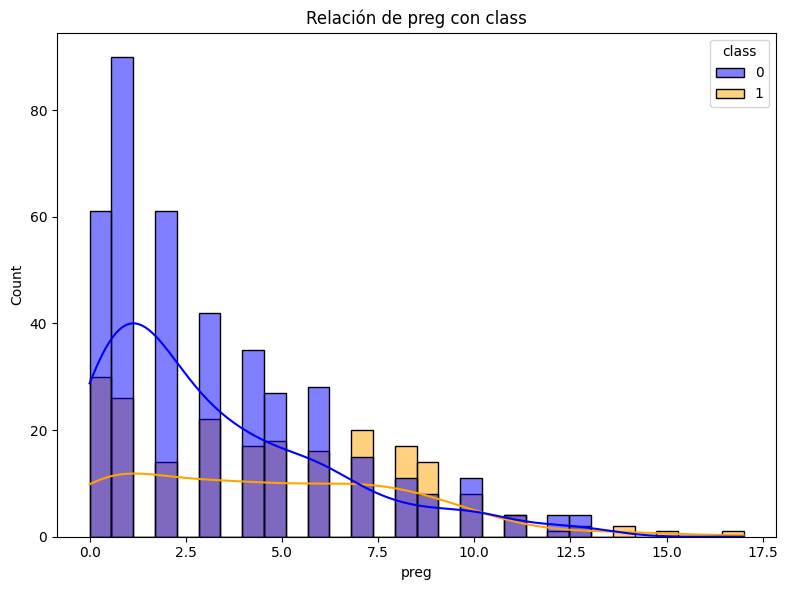

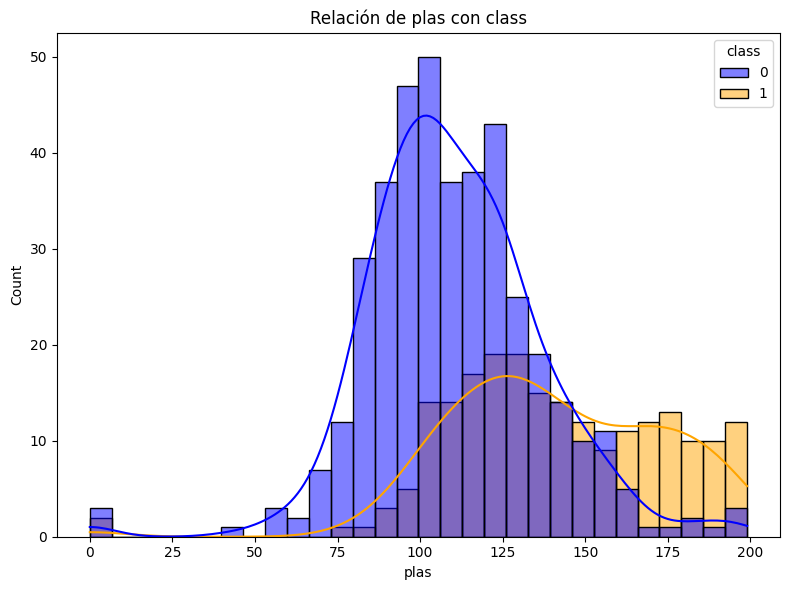

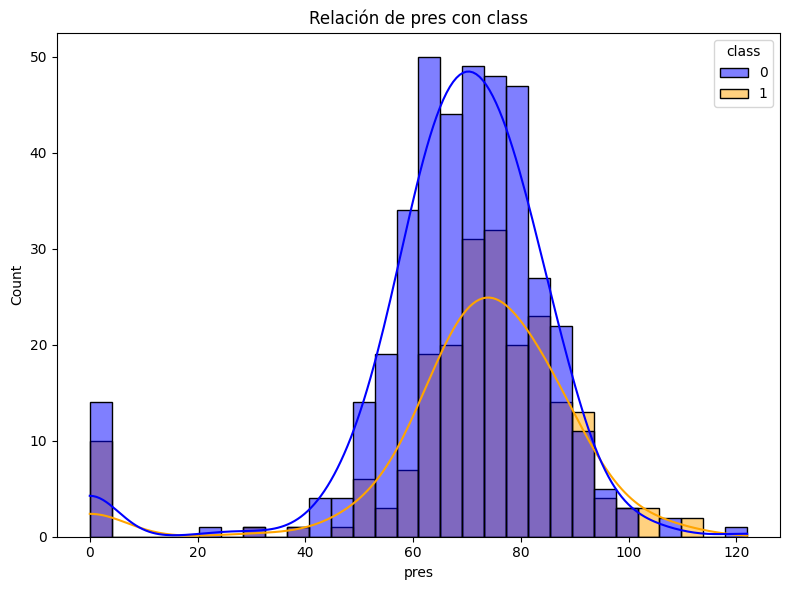

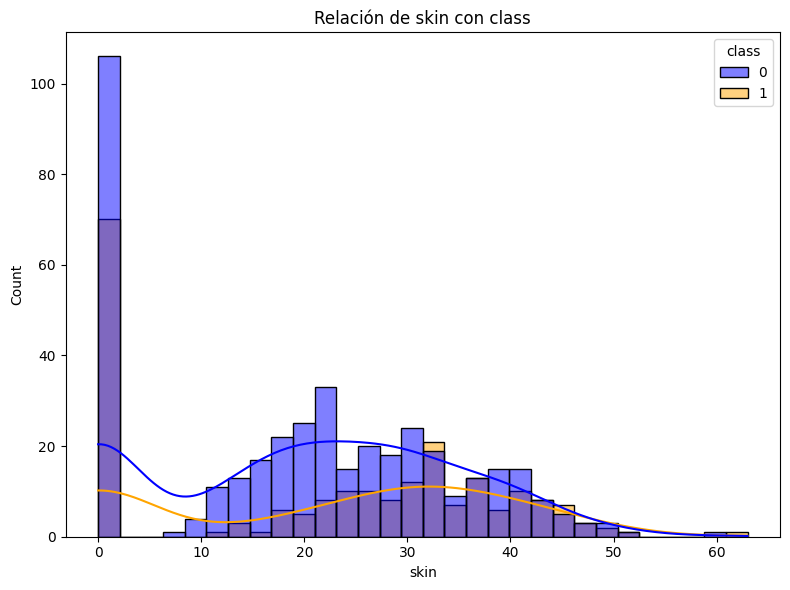

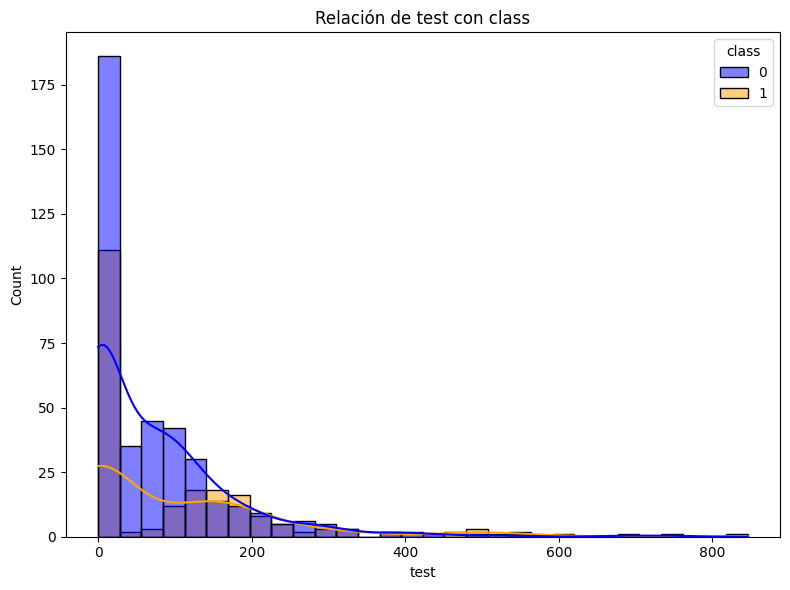

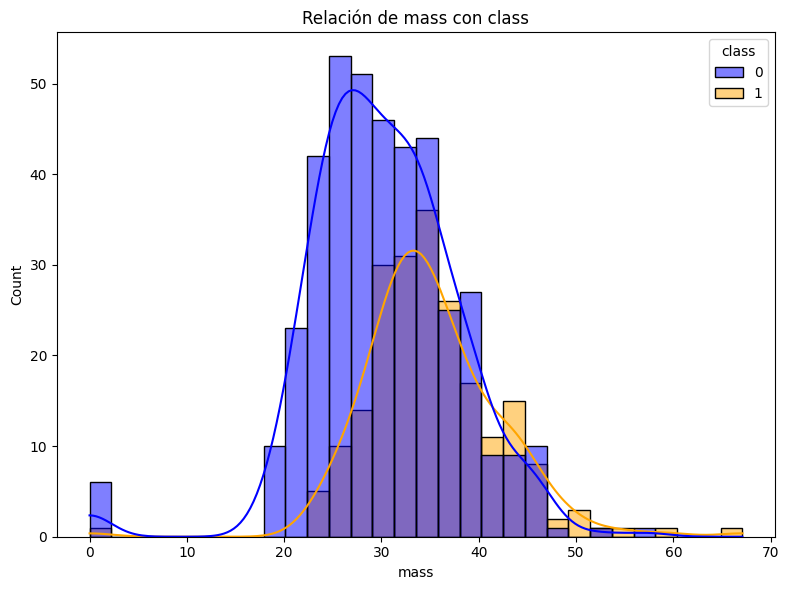

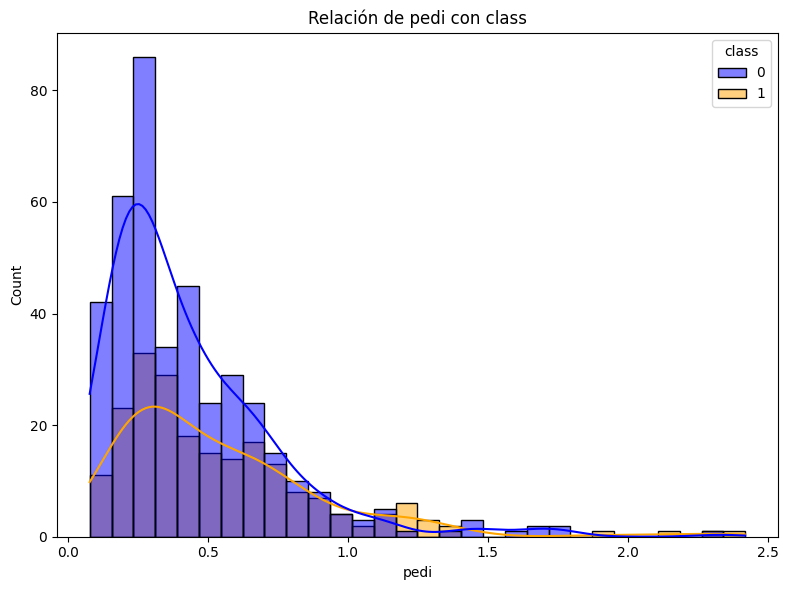

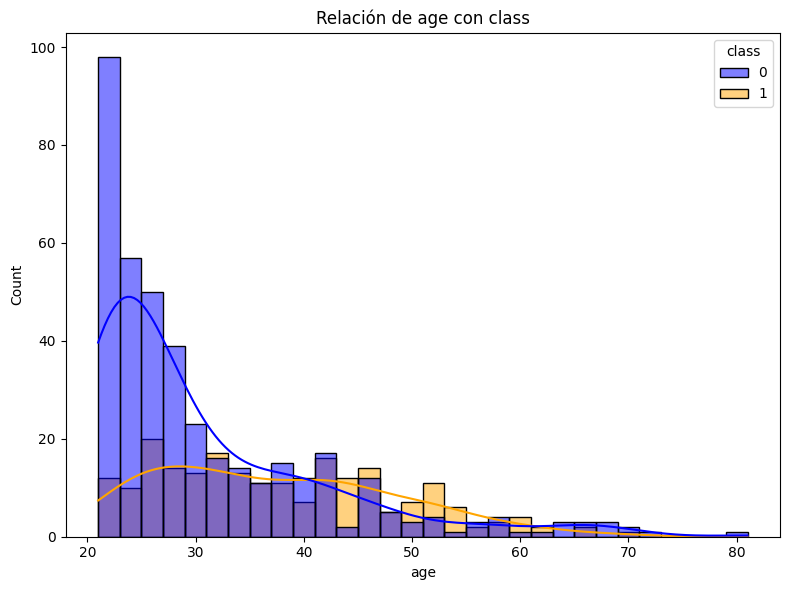

In [10]:
# Analizamos cada una de ellas
for col in features:
    plt.figure(figsize=(8,6))
    sns.histplot(data=train_set, x=col, hue=target, 
             bins=30, palette=['blue', 'orange'], multiple='layer', alpha=0.5, kde=True)
    plt.title(f'Relación de {col} con {target}')
    plt.tight_layout()


En la gran mayoría tienen una distribución similar, sin embargo, en todas ellas hay algo destacable y significativo por lo que seleccionaremos a todas como **Features**

### Transformación de las **Features**

Echamos un vistazo a la distribución de manera univariable

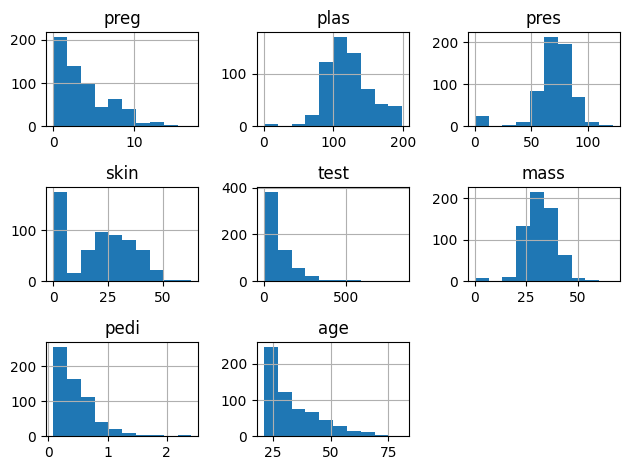

In [11]:
train_set[features].hist()
plt.tight_layout()

Algunas necesitan realizar un logaritmo por lo que las seleccionaremos y lo realizaremos teniendo en cuenta los valores 0 ya que se converitirían en -inf

In [12]:
features_log = [col for col in features if col != 'plas' and col != 'pres' and col !='mass']
features_log

['preg', 'skin', 'test', 'pedi', 'age']

In [13]:
for col in features_log:
    train_set.loc[train_set[col] == 0, col] = 1
    train_set[col] = train_set[col].apply(np.log)


Haré lo mismo en **Test**

In [14]:
for col in features_log:
    test_set.loc[test_set[col] == 0] = 1
    test_set[col] = test_set[col].apply(np.log)

Como la **Target** es un 0 y un 1, realizaré un min_max_escaler para que los valores estén entorno de 0 y 1

In [15]:
train_set[features].describe()

,preg,plas,pres,skin,test,mass,pedi,age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.012838,120.855049,69.415309,2.344251,2.534629,31.983388,-0.968198,3.440334
std,0.854272,32.035057,18.512599,1.521476,2.451201,7.740625,0.646025,0.317637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.551046,3.044522
25%,0.000000,100.000000,64.000000,0.000000,0.000000,27.100000,-1.420892,3.178054
50%,1.098612,117.000000,72.000000,3.135494,3.749435,32.000000,-0.987526,3.367296
75%,1.791759,139.000000,80.000000,3.465736,4.865604,36.375000,-0.488168,3.688879
max,2.833213,199.000000,122.000000,4.143135,6.740519,67.100000,0.883768,4.394449


In [16]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
train_set[features] = min_max_scaler.fit_transform(train_set[features])

In [17]:
train_set[features].describe()

,preg,plas,pres,skin,test,mass,pedi,age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.357487,0.607312,0.568978,0.565816,0.376029,0.476653,0.460825,0.293210
std,0.301520,0.160980,0.151743,0.367228,0.363652,0.115360,0.188081,0.235299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.502513,0.524590,0.000000,0.000000,0.403875,0.329029,0.098918
50%,0.387762,0.587940,0.590164,0.756793,0.556253,0.476900,0.455198,0.239104
75%,0.632412,0.698492,0.655738,0.836501,0.721844,0.542101,0.600579,0.477327
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hago lo mismo en **Test**

In [18]:
test_set[features] = min_max_scaler.transform(test_set[features])

Creo las variables X,y

In [19]:
y_train = train_set[target]
X_train = train_set[features]
y_test = test_set[target]
X_test = test_set[features]

### Comparación de modelos de clasifación

Como nos encontramos con una **Target** categórica binaria, siendo los 1s las personas que han padecido diabetes frente a los 0s siendo las que no lo han padecido, haremos uso de modelos de clasificación exclusivamente

#### Cargo todos los modelos que voy a comparar

Haré uso de:

- Random Forest (Bagging)

- XGBoost (Boosting)

- LightGBM (Boosting)

Además, utilizaré GridSearch para tener la posibilidad de tener mejor optimización.

In [20]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [21]:
metricas_optimizadas = {}

In [90]:
# Random Forest

rf_clf = RandomForestClassifier()

param_grid_rf = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    "min_samples_leaf": [10,20,40],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1],
    "class_weight": ["balanced", None]
}

rf_grid = GridSearchCV(rf_clf,
                       cv = 3,
                       param_grid=param_grid_rf,
                       scoring='accuracy')

rf_grid.fit(X_train, y_train)
print('RF best_score: ', rf_grid.best_score_)
print('RF best_params: ', rf_grid.best_params_)
metricas_optimizadas['RandomForest'] = rf_grid.best_score_

RF best_score:  0.7784791965566714
RF best_params:  {'class_weight': 'balanced', 'max_depth': 4, 'max_features': None, 'max_samples': 0.3, 'min_samples_leaf': 10, 'n_estimators': 200}


In [91]:
# XGBoost

xgb_clf = XGBClassifier()

param_grid_xgb = {
    'max_depth': [3, 6, 10, 15],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 250, 500, 750],
}

xgb_grid = GridSearchCV(xgb_clf,
                        cv = 3,
                        param_grid=param_grid_xgb,
                        scoring='accuracy')

xgb_grid.fit(X_train, y_train)
print('XGBoost best_score: ', xgb_grid.best_score_)
print('XGBoost best_params: ', xgb_grid.best_params_)
metricas_optimizadas['XGBoost'] = xgb_grid.best_score_

XGBoost best_score:  0.7833891280089271
XGBoost best_params:  {'colsample_bylevel': 0.5, 'colsample_bytree': 0.7999999999999999, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 750, 'subsample': 0.7999999999999999}


In [25]:
# LightGBM

lgb_clf = LGBMClassifier(verbose = -100)

param_grid_lgb = {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'bagging_fraction': [0.3,0.6,1],
          'feature_fraction': [0.5,1],
          'n_estimators': [100, 250, 500, 750],
          'max_bins': [125,250]
          }

lgb_grid = GridSearchCV(lgb_clf, 
                        cv = 3,
                        param_grid= param_grid_lgb, 
                        scoring = "accuracy")


lgb_grid.fit(X_train, y_train)
print("LGB best_score:", lgb_grid.best_score_)
print('LGB best_params: ', lgb_grid.best_params_)
metricas_optimizadas["LightGBM"] = lgb_grid.best_score_

LGB best_score: 0.7735852064402997
LGB best_params:  {'bagging_fraction': 0.3, 'feature_fraction': 0.5, 'learning_rate': 0.1, 'max_bins': 125, 'max_depth': 3, 'n_estimators': 250}


Voy a probar en usar otra métrica que es mejor para clases desbalanceadas como `f1_macro`

In [29]:
# Random Forest

rf_clf = RandomForestClassifier()

param_grid_rf = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    "min_samples_leaf": [10,20,40],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1],
    "class_weight": ["balanced", None]
}

rf_grid_f1 = GridSearchCV(rf_clf,
                       cv = 3,
                       param_grid=param_grid_rf,
                       scoring='f1_macro')

rf_grid_f1.fit(X_train, y_train)

c:\Users\sorim\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [2, 4, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.3, 0.6, 1],
                         'min_samples_leaf': [10, 20, 40],
                         'n_estimators': [100, 200, 400]},
             scoring='f1_macro')

In [30]:
print('RF best_score con F1: ', rf_grid_f1.best_score_)
print('RF best_params con F1: ', rf_grid_f1.best_params_)
metricas_optimizadas['RandomForest'] = rf_grid_f1.best_score_

RF best_score con F1:  0.7621733787527525
RF best_params con F1:  {'class_weight': 'balanced', 'max_depth': 10, 'max_features': None, 'max_samples': 0.3, 'min_samples_leaf': 10, 'n_estimators': 100}


In [31]:
# XGBoost

xgb_clf = XGBClassifier()

param_grid_xgb = {
    'max_depth': [3, 6, 10, 15],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 250, 500, 750],
}

xgb_grid_f1 = GridSearchCV(xgb_clf,
                        cv = 3,
                        param_grid=param_grid_xgb,
                        scoring='f1_macro')

xgb_grid_f1.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 6, 10, 15],
                         'n_estimators': [100, 250, 500, 750],
                         'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='f1_macro')

In [32]:
print('XGBoost best_score con F1: ', xgb_grid_f1.best_score_)
print('XGBoost best_params con F1: ', xgb_grid_f1.best_params_)
metricas_optimizadas['XGBoost'] = xgb_grid_f1.best_score_

XGBoost best_score con F1:  0.7602491474673329
XGBoost best_params con F1:  {'colsample_bylevel': 0.5, 'colsample_bytree': 0.7999999999999999, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 750, 'subsample': 0.7999999999999999}


In [24]:
lgb_clf = LGBMClassifier(verbose = -100)

param_grid_lgb = {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'bagging_fraction': [0.3,0.6,1],
          'feature_fraction': [0.5,1],
          'n_estimators': [100, 250, 500, 750],
          'max_bins': [125,250]
          }

lgb_grid_f1 = GridSearchCV(lgb_clf, 
                        cv = 3,
                        param_grid= param_grid_lgb, 
                        scoring = "f1_macro")


lgb_grid_f1.fit(X_train, y_train)

c:\Users\sorim\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=LGBMClassifier(verbose=-100),
             param_grid={'bagging_fraction': [0.3, 0.6, 1],
                         'feature_fraction': [0.5, 1],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_bins': [125, 250], 'max_depth': [3, 6, 12],
                         'n_estimators': [100, 250, 500, 750]},
             scoring='f1_macro')

In [25]:
print("LGB best_score con F1-score:", lgb_grid_f1.best_score_)
print('LGB best_params con F1-score: ', lgb_grid_f1.best_params_)
metricas_optimizadas["LightGBM"] = lgb_grid_f1.best_score_

LGB best_score con F1-score: 0.7460535440164969
LGB best_params con F1-score:  {'bagging_fraction': 0.3, 'feature_fraction': 0.5, 'learning_rate': 0.1, 'max_bins': 125, 'max_depth': 3, 'n_estimators': 250}


*Conclusiones*

- Haciendo el entrenamiento con accuracy primero, los resultados obtenidos nos desvelan que **XGBoost** tiene un 0.78 de error. Por lo que sería el mejor modelo para nuestros datos.

- En cambio, usando la métrica F1-score, **Random Forest**, con un 0.7621, ligeramente mayor que XGBoost (0.7602), se proclamaría ganadora. Es importante destacar que Random Forest tiene un hiperparámetro `class_weight` la cual desbalancea las clases si no están equilibradas y, además, la métrica utilizada en este caso también favorece a las proporciones de las clases dándolas la misma importancia.

###### (No he utilizado la lista `metrica_optimizadas` porque tendría que cargar todo de nuevo y tarda bastante XGBoost)